In [11]:
import pickle
import time
import numpy as np
import argparse
import re

from envs import TradingEnv
from agent import DQNAgent
from utils import *

In [14]:
def early_stop(reward_hist, patience, skip= 0):
    #Skip the first n epochs
    if len(reward_hist) <= skip:
        return False
    reward_hist = reward_hist[skip:]
    count = 0
    max_reward = float('-inf')
    for i in range(1,len(reward_hist)):
        if reward_hist[i] <= max_reward:
            count += 1
        elif reward_hist[i] > max_reward:
            max_reward = reward_hist[i]
            count = 0
    if count >= patience:
        print('Stop the training')
        return True
    else:
        return False

In [26]:
mode = 'train'

weights = 'weights/202111180111-dqn.h5'
episode = 1000
batch_size = 32
initial_invest = 20000

maybe_make_dir('weights')
maybe_make_dir('portfolio_val')

timestamp = time.strftime('%Y%m%d%H%M')

data = np.around(get_data())
train_data = data[:, :3526]
test_data = data[:, 3526:]

env = TradingEnv(train_data, initial_invest)
state_size = env.observation_space.shape
action_size = env.action_space.n
# print(state_size)
# print(action_size)
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

portfolio_value = []

if mode == 'test':
    #remake the env with test data
    env = TradingEnv(test_data, initial_invest)
    # load trained weights
    agent.load(weights)
    #when test, the timestamp is same as time when weights was trained
    timestamp = re.findall(r'\d{12}', weights)[0]
    
for e in range(episode):
    state = env.reset()
    state = scaler.transform([state])
    for t in range(env.n_step):
        if t%1000 == 0:
            print('Step: {}/{}'.format(t,env.n_step))
        action = agent.act(state)
#         print('action:\t',action)
        next_state, reward, done, info = env.step(action)
        next_state = scaler.transform([next_state])
        if mode == 'train':
            agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print('episode: {}/{}, episode end value: {}'.format(e+1, episode, info['cur_val']))
            portfolio_value.append(info['cur_val']) #append apisode end to portfolio
            break
        if mode == 'train' and len(agent.memory) > batch_size:
#             print('Begin training...')
            agent.replay(batch_size)
#             print('Finish training...')
    if mode == 'train' and (e+1)%1 == 0: #checkpoint weights
#         print('Checkpoint...')
        agent.save('weights/{}-dqn.h5'.format(timestamp))
#         if early_stop(portfolio_value, patience = 10, skip= 0):
#             break
        
#save portfolio value history to disk    
with open('portfolio_val/{}-{}.p'.format(timestamp, mode), 'wb') as fp:
    pickle.dump(portfolio_value, fp)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 27)                891       
Total params: 2,203
Trainable params: 2,203
Non-trainable params: 0
_________________________________________________________________
None
Step: 0/3526


KeyboardInterrupt: 

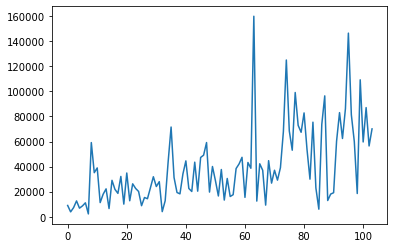

In [24]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(portfolio_value))], portfolio_value)

In [38]:
mode = 'test'

weights = 'weights/202111202233-dqn.h5'
episode = 100
batch_size = 32
initial_invest = 20000

maybe_make_dir('weights')
maybe_make_dir('portfolio_val')

timestamp = time.strftime('%Y%m%d%H%M')

data = np.around(get_data())
train_data = data[:, :3526]
test_data = data[:, 3526:]

env = TradingEnv(train_data, initial_invest)
state_size = env.observation_space.shape
action_size = env.action_space.n
# print(state_size)
# print(action_size)
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

portfolio_value = []

if mode == 'test':
    #remake the env with test data
    env = TradingEnv(test_data, initial_invest)
    # load trained weights
    agent.load(weights)
    #when test, the timestamp is same as time when weights was trained
    timestamp = re.findall(r'\d{12}', weights)[0]
    
for e in range(episode):
    state = env.reset()
    state = scaler.transform([state])
    for t in range(env.n_step):
        if t%1000 == 0:
            print('Step: {}/{}'.format(t,env.n_step))
        action = agent.act(state)
#         print('action:\t',action)
        next_state, reward, done, info = env.step(action)
        next_state = scaler.transform([next_state])
        if mode == 'train':
            agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print('episode: {}/{}, episode end value: {}'.format(e+1, episode, info['cur_val']))
            portfolio_value.append(info['cur_val']) #append apisode end to portfolio
            break
        if mode == 'train' and len(agent.memory) > batch_size:
#             print('Begin training...')
            agent.replay(batch_size)
#             print('Finish training...')
    if mode == 'train' and (e+1)%1 == 0: #checkpoint weights
#         print('Checkpoint...')
        agent.save('weights/{}-dqn.h5'.format(timestamp))
#         if early_stop(portfolio_value, patience = 10, skip= 0):
#             break
        
#save portfolio value history to disk    
with open('portfolio_val/{}-{}.p'.format(timestamp, mode), 'wb') as fp:
    pickle.dump(portfolio_value, fp)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_58 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_59 (Dense)             (None, 27)                891       
Total params: 2,203
Trainable params: 2,203
Non-trainable params: 0
_________________________________________________________________
None
Step: 0/1000
episode: 1/100, episode end value: 10559.0
Step: 0/1000
episode: 2/100, episode end value: 25651.0
Step: 0/1000
episode: 3/100, episode end value: 16981.0
Step: 0/1000
episode: 4/100, episode end value: 21527.0
Step: 0/1000
episode: 5/100, episode end value: 27033.0
Step: 0/1000
episode: 6/100, episode end value: 10672.0
Step: 0/1000
episode: 7/100, episode end

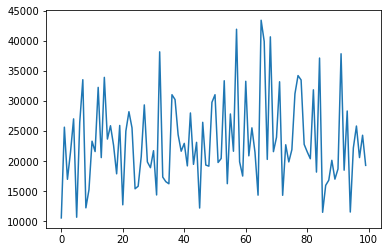

In [39]:
import matplotlib.pyplot as plt

plt.plot(portfolio_value)